# Blobs detection

This is a guide to blobs detection in 2D images by means of python Blobs class. The algorithm is based by multi-scale  Laplacian of Gaussian filter. 



How to proceed:



* Install the required packages from requirements.txt


* Make sure the code directory is on your system path


* Import Blobs class:
```from blobs import Blobs```


* Create a class instance and read an image with blobs by providing the path and the filename (with tif extension):
```blobs = Blobs(pathtodata = datapath, filetoread = filename)```


* Call ```detect_blobs_multiscale```method on the class instance by specifying the minimum and the maximum size of blobs to search for and a threshold value ```log_thres``` between 0 and 1. See more in the method's docstring:
```blobs.detect_blobs_multiscale(diameter_min=d_min, diameter_max=d_max, log_thres=log_thres)```


* Call ```plot_image```method with boxes=True to visualise the image and the bounding boxes around detected blobs:
```blobs.plot_image(image_mode = "raw", boxes=True)```


* Detected boxes are saved as a list of matplotlib.patches.Rectangle objects in the ```blobs.blobs_boxes```.
* The blobs maxima are saved as a binary image in ```blobs.blobs_maxima```. Pixel values = 1 are the inferred locations of blobs' maxima in the input image.


In [181]:
#import packages
import sys
import glob, os

# set source path
codepath = os.path.abspath('/Users/Pavel/Documents/technical_exercise/oni')
if codepath not in sys.path:
    sys.path.append(codepath)

#automatically track changes in the source code
%load_ext autoreload
%autoreload 2

%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tests with simulated images

Here are some tests I did using simulated images. First generate an image of point-like patches of uniform intensity. Then convolve this image with a 2D Gaussian kernel of a fixed width to blur the patches and make them look like blobs. 

## Generate images with blobs

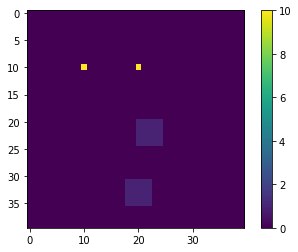

In [182]:
# generate point-like patches

import numpy as np
from matplotlib import pyplot as plt

test_points = np.zeros((40,40))
test_points[20:25,20:25] = 1
test_points[31:36,18:23] = 1
test_points[10,10] = 10
test_points[10,20] = 10

plt.imshow(test_points)
plt.colorbar()
plt.show()

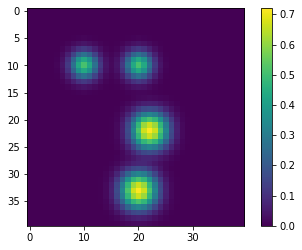

In [183]:
# convolve them with a Gaussian

from scipy.ndimage import gaussian_filter
s = 0.5 * 5/np.sqrt(2)

# get noise-less blobs
test_blobs = gaussian_filter(test_points, sigma=s)
plt.imshow(test_blobs)
plt.colorbar()
plt.show()

* Add some Gaussian noise to the generated image. 

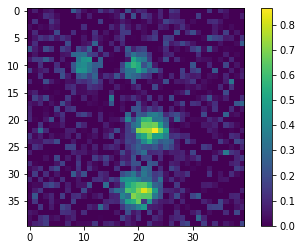

In [184]:
# add some noise
from skimage.util import random_noise

test_blobs_noisy = random_noise(test_blobs, mode='gaussian', seed=None, clip=True)

plt.imshow(test_blobs_noisy)
plt.colorbar()
plt.show()

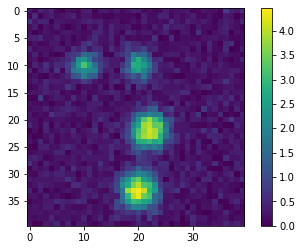

In [111]:
# average over multiple noisy images
from skimage.util import random_noise

test_blobs_noisy_aver = random_noise(test_blobs, mode='gaussian', seed=None, clip=True)
for ii in range(5):
    test_blobs_noisy_aver += random_noise(test_blobs, mode='gaussian', seed=None, clip=True)
plt.imshow(test_blobs_noisy_aver)
plt.colorbar()
plt.show()

## Blobs detection in the absense of noise

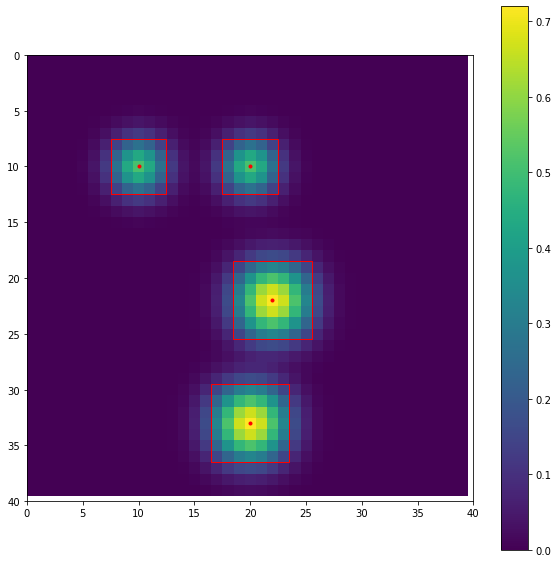

In [114]:
# set min and max blobs' diameter to detect - we are looking for blobs of size 5 and 7
d_min = 3
d_max = 9
log_thres = 0.3 # threshold parameter to cut off blobs of low intensity

# initialise
from blobs import Blobs
blobs = Blobs()

# read image
blobs.image = test_blobs

# detect blobs
blobs.detect_blobs_multiscale(diameter_min=d_min, diameter_max=d_max, log_thres=log_thres)
blobs.plot_image(image_mode = "raw", boxes=True, roi_x0=0, roi_y0=0)

* The procedure works well in the absense of noise

## Blobs detection in the presence of noise

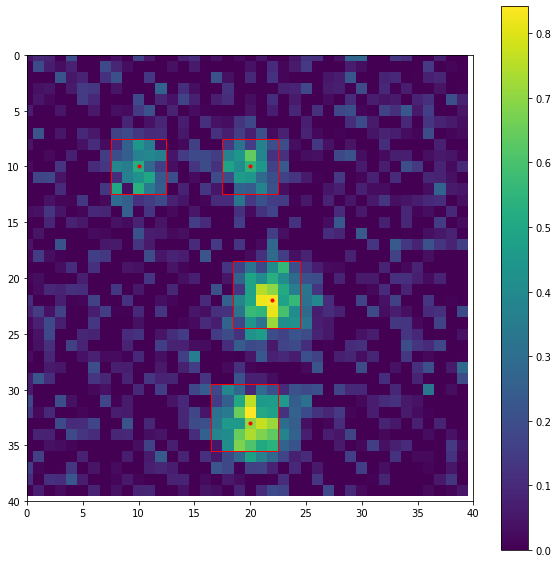

In [180]:
# set min and max blobs' diameter to detect - we are looking for blobs of size 5 and 7
d_min = 3
d_max = 9
log_thres = 0.3 # threshold parameter to cut off blobs of low intensity

# initialise
from blobs import Blobs
blobs = Blobs()

# read image
blobs.image = test_blobs_noisy

# detect blobs
blobs.detect_blobs_multiscale(diameter_min=d_min, diameter_max=d_max, log_thres=log_thres)
blobs.plot_image(image_mode = "raw", boxes=True, roi_x0=0, roi_y0=0)

* There may be some inaccuracies in detection in noisy images . This can be improved by averaging over multiple datasets to mitigate the effect of noise.

## Blobs detection in the presence of noise, averaging over multiple noisy images

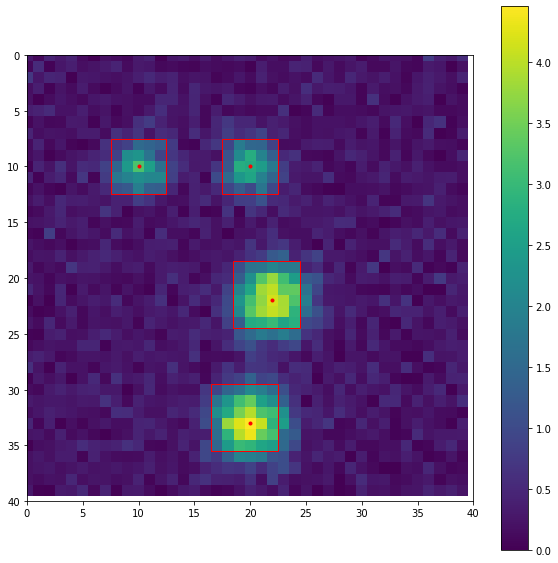

In [116]:
# set min and max blobs' diameter to detect - we are looking for blobs of size 5 and 7
d_min = 3
d_max = 9
log_thres = 0.3 # threshold parameter to cut off blobs of low intensity

# initialise
from blobs import Blobs
blobs = Blobs()

# read image
blobs.image = test_blobs_noisy_aver

# detect blobs
blobs.detect_blobs_multiscale(diameter_min=d_min, diameter_max=d_max, log_thres=log_thres)
blobs.plot_image(image_mode = "raw", boxes=True, roi_x0=0, roi_y0=0)

# Blobs detection in provided images
# Data 1

In [185]:
# set datapath
datapath = os.path.abspath('/Users/Pavel/Documents/technical_exercise/oni/challengeFiles')

# an average of the provided stack of images
filename = "G-ex_P100_50deg_exp100_2017-05-18_15h25m02s936ms-1.tif"

# initialise
blobs = Blobs(pathtodata = datapath, filetoread = filename)
im2 = blobs.image
# detect blobs
# we are looking for blobs of ca. 6 pixels large
d_min = 4
d_max = 8

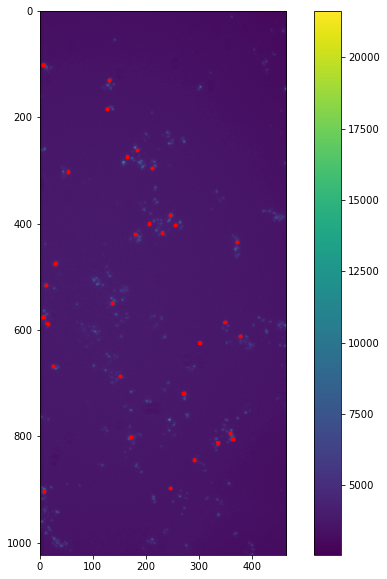

In [186]:
log_thres = 0.1 # threshold parameter to cut off blobs of low intensity

blobs.detect_blobs_multiscale(diameter_min=d_min, diameter_max=d_max, log_thres=log_thres)
blobs.plot_image(image_mode = "raw", boxes=True)

### Low threshold

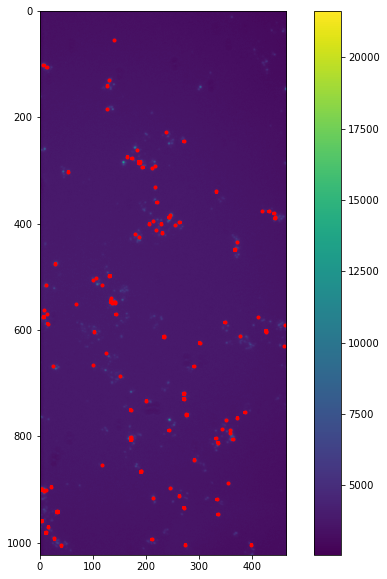

In [187]:
log_thres = 0.02 # threshold parameter to cut off blobs of low intensity
blobs.detect_blobs_multiscale(diameter_min=d_min, diameter_max=d_max, log_thres=log_thres)
blobs.plot_image(image_mode = "raw", boxes=True)


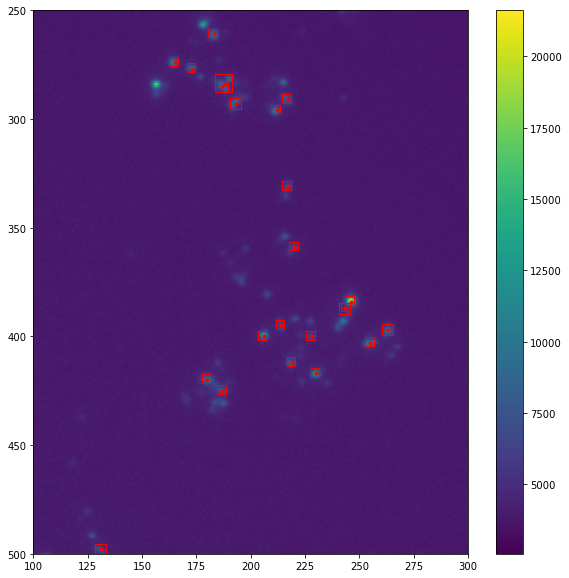

In [188]:
# zoom in 
blobs.plot_image(image_mode = "raw", boxes=True, roi_x0=100, roi_y0=250, roi_x = 200, roi_y = 250)

# Blobs detection in provided images
# Data 2

In [189]:
# set datapath
datapath = os.path.abspath('/Users/Pavel/Documents/technical_exercise/oni/challengeFiles')

# an average of the provided stack of images
filename = "AVG_Wed_morningSession_nup555_647.1528885469405-2.tif"

# initialise
blobs = Blobs(pathtodata = datapath, filetoread = filename)
im2 = blobs.image
# detect blobs
# we are looking for blobs of ca. 6 pixels large
d_min = 4
d_max = 8

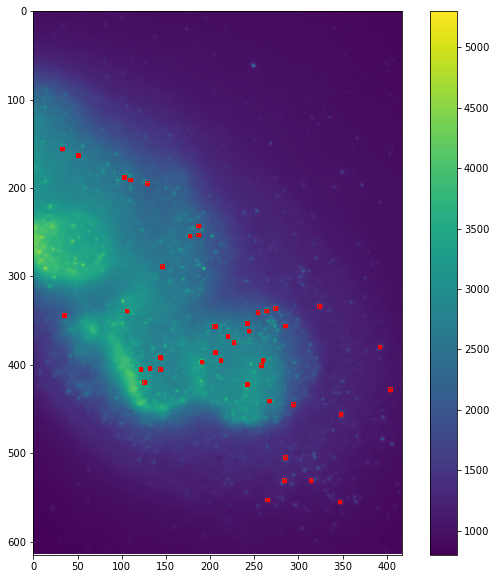

In [190]:
log_thres = 0.1 # threshold parameter to cut off blobs of low intensity

blobs.detect_blobs_multiscale(diameter_min=d_min, diameter_max=d_max, log_thres=log_thres)
blobs.plot_image(image_mode = "raw", boxes=True)

### Low threshold

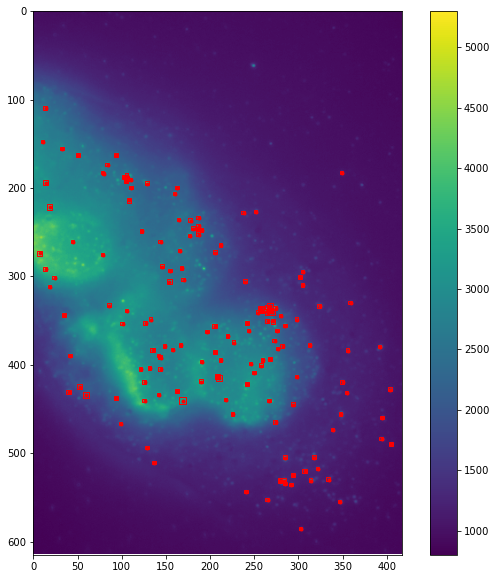

In [191]:
log_thres = 0.02 # threshold parameter to cut off blobs of low intensity
blobs.detect_blobs_multiscale(diameter_min=d_min, diameter_max=d_max, log_thres=log_thres)
blobs.plot_image(image_mode = "raw", boxes=True)


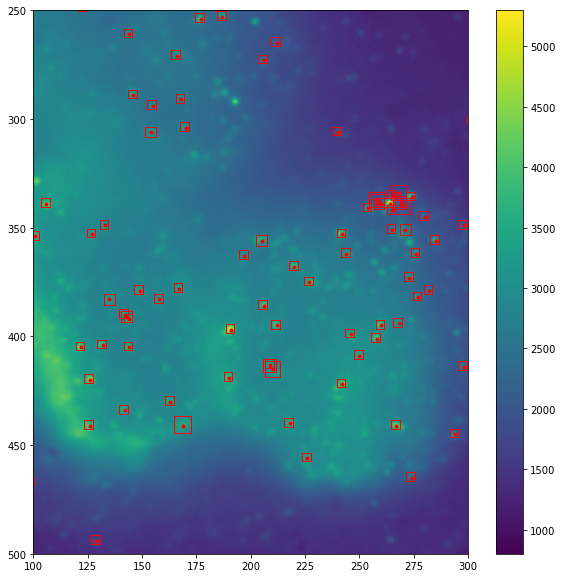

In [168]:
# zoom in 
blobs.plot_image(image_mode = "raw", boxes=True, roi_x0=100, roi_y0=250, roi_x = 200, roi_y = 250)

* The algorithm detects blobs in provided images, but it is rather sensitive to noise and background in the images. And requires a somewhat low threshold whilst detecting maxima in the LoG scale space. Some noise reduction methods or subtraction of background (e.g. cloud-like feature in the dataset 2) may help to improve the quality of the blobs detection with the suggested algorithm.